# Memory-Driven Coin Tossing: Exploring Probabilities and Betting Strategies

In [901]:
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
from scipy.special import binom
import seaborn as sns

## About the code

This theory aims to estimate the probabilities of heads and tails in coin tosses by considering previous outcomes. This theory attempts to introduce a notion of memory to the process, although it is acknowledged that, theoretically, the coin-tossing process is memoryless. Using the binomial distribution, we calculate the combinations of heads and tails after N tosses. The probabilities of heads and tails for the next toss are obtained by normalizing these quantities. By setting a threshold, we can make betting decisions based on the estimated probabilities. However, it is important to note that these estimates assume a fair and unbiased coin-tossing process with independent tosses.

In [91]:
def compute_binoms(n):
    binoms = np.array([binom(n, x) for x in range(n + 1)])
    binoms = binoms / np.sum(binoms)
    return binoms

hypotetical limited budget: 50, budget needed: 63


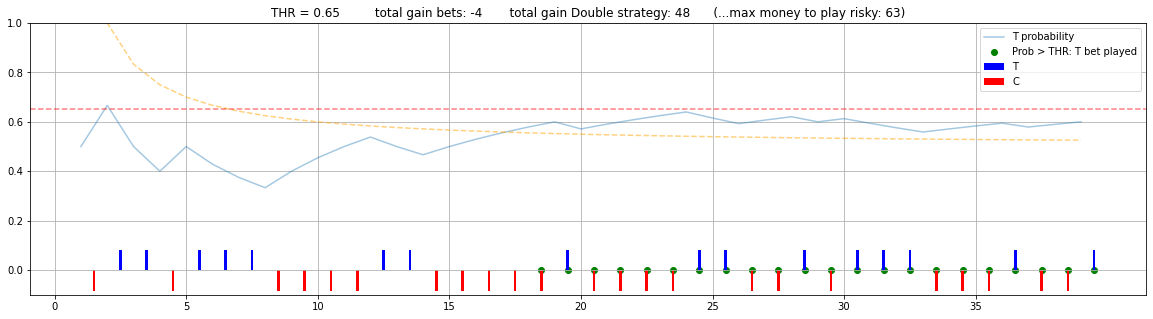

In [708]:
turns = 40
num_ts = 0
limit_money = 50
THR = 0.65
bet, bet_happened = 1, False
events, NOS, YES, YES_NORM, bets_turn, bet_valuation, timed_bet_valuation = [], [], [], [], [], [], []
for turn in range(1, turns):
    
    p = 0.5 + 1 / turn
    bs = compute_binoms(turn)
    prob_no = bs[num_ts]
    prob_yes = bs[num_ts + 1]
    NOS.append(prob_no), YES.append(prob_yes)
    yes_norm = prob_yes / (prob_yes + prob_no)
    YES_NORM.append(yes_norm)
    
    timed_bet_valuation.append(bet)
    
    toss_chr = np.random.choice(['C', 'T'])
    toss_bin = 0
    if toss_chr == 'T':
        toss_bin = 1
        num_ts += 1
        bet = 1
    else:
        bet += 1
        
    events.append([turn, toss_bin])
    
    # ---------bet-----------
    if yes_norm > p: # ...  or THR
        bet_happened = True
        bets_turn.append(turn)
        bet_valuation.append(toss_bin)
    
    
    
    
#     print(f'\nturn: {turn} -> prob no T:{prob_no} - prob yes T: {prob_yes} - prob yes normT: {yes_norm}')
#     print(f'{toss_chr}... number of T tossed: {num_ts}')
events = np.array(events)
bets_turn = np.array(bets_turn)
bet_valuation = np.array(bet_valuation)
timed_bet_valuation = np.array(timed_bet_valuation)


plt.figure(figsize=(20,5))
plt.plot(range(1, turns), YES_NORM, alpha=0.4, label='T probability')
plt.bar(events[:,0] + 0.5, events[:,1]*np.min(YES_NORM)*0.25, width=0.1, color='blue', label='T')
plt.bar(events[:,0] + 0.5, (events[:,1] - 1)*np.min(YES_NORM)*0.25, width=0.1, color='red', label='C')
plt.scatter(bets_turn + 0.5, [0] * len(bets_turn), c='green', label='Prob > THR: T bet played')
plt.legend()
plt.grid(), plt.xticks(range(0, turns, 5))

if bet_happened:
    good_bets, bad_bets = len(bet_valuation[bet_valuation == 1]), len(bet_valuation[bet_valuation == 0])
    a = timed_bet_valuation[bets_turn - 1]
    b = events[bets_turn - 1, 1]
    rg = np.sum([2 ** x for x, e in zip(a, b) if e == 1])
    rb = np.sum([- 2 ** x for x, e in zip(a, b) if e == 0])
    max_money_to_play_risky = np.sum([2**x for x in range(np.max(a))])
    plt.title(f'THR = {THR}         total gain bets: {good_bets - bad_bets}       total gain Double strategy: {rg + rb}      (...max money to play risky: {max_money_to_play_risky})');
    print(f'hypotetical limited budget: {limit_money}, budget needed: {max_money_to_play_risky}')
else:
    plt.title(f'THR = {THR}')

ps = 0.5 + 1 / np.array([x for x in range(1, turns)])
plt.plot(range(1, turns), ps, color='orange', linestyle='dashed', alpha = 0.5)
plt.axhline(THR, color='red', linestyle='dashed', alpha = 0.5)
plt.ylim(- np.min(YES_NORM)*0.3, 1);

In [883]:
def simulate(turns=10, THR=0.6, thr_type='linear',
             cost_hyp=1, cost_exp=1, risky_multiplier=2, 
             seed=None,
            plot_simulation=False):
    
    if seed is not None:
        np.random.seed(seed)
        seed_array = np.random.randint(0, 10000, turns)
        
    num_ts = 0
    bet, bet_happened = 1, False
    events, NOS, YES, YES_NORM, bets_turn, bet_valuation, timed_bet_valuation = [], [], [], [], [], [], []
    for i, turn in enumerate(range(1, turns)):
        
        bs = compute_binoms(turn)
        prob_no = bs[num_ts]
        prob_yes = bs[num_ts + 1]
        NOS.append(prob_no), YES.append(prob_yes)
        yes_norm = prob_yes / (prob_yes + prob_no)
        YES_NORM.append(yes_norm)

        timed_bet_valuation.append(bet)
        
        if seed is not None:
            np.random.seed(seed_array[i])
        toss_chr = np.random.choice(['C', 'T'])
        toss_bin = 0
        if toss_chr == 'T':
            toss_bin = 1
            num_ts += 1
            bet = 1
        else:
            bet += 1

        events.append([turn, toss_bin])

        # ---------bet-----------
        if thr_type == 'linear':
            thr = THR
        elif thr_type == 'root hyp':
            thr = 0.5 + cost_hyp / np.sqrt(turn)
        elif thr_type == 'hyp':
            thr =  0.5 + cost_hyp / turn
        elif thr_type == 'exp':
            thr = 0.5 + cost_exp * np.exp(- turn)
        else:
            raise ValueError('choose a valid thr_type.')
            
        if yes_norm > thr:
            bet_happened = True
            bets_turn.append(turn)
            bet_valuation.append(toss_bin)




    #     print(f'\nturn: {turn} -> prob no T:{prob_no} - prob yes T: {prob_yes} - prob yes normT: {yes_norm}')
    #     print(f'{toss_chr}... number of T tossed: {num_ts}')
    events = np.array(events)
    bets_turn = np.array(bets_turn)
    bet_valuation = np.array(bet_valuation)
    timed_bet_valuation = np.array(timed_bet_valuation)
    tot, tot_risky, max_money_to_play_risky = None, None, None

    if bet_happened:
        good_bets, bad_bets = len(bet_valuation[bet_valuation == 1]), len(bet_valuation[bet_valuation == 0])
        a = timed_bet_valuation[bets_turn - 1]
        b = events[bets_turn - 1, 1]
        rg = np.sum([int(risky_multiplier ** x) for x, e in zip(a, b) if e == 1])
        rb = np.sum([- int(risky_multiplier ** x) for x, e in zip(a, b) if e == 0])
        tot, tot_risky = good_bets - bad_bets, rg + rb
        max_money_to_play_risky = np.sum([2**x for x in range(np.max(a))])

    if plot_simulation:
        plt.figure(figsize=(20,5))
        plt.plot(range(1, turns), YES_NORM, alpha=0.4)
        plt.bar(events[:,0] + 0.5, events[:,1]*np.min(YES_NORM)*0.25, width=0.1, color='blue', alpha=0.4, label='T')
        plt.bar(events[:,0] + 0.5, (events[:,1] - 1)*np.min(YES_NORM)*0.25, width=0.1, color='red', alpha=0.4, label='C')
        plt.scatter(bets_turn + 0.5, [0] * len(bets_turn), c='green', label='Prob > THR: T bet played')
        if thr_type == 'linear':
            plt.axhline(THR, color='red', linestyle='dashed', alpha = 0.5, label='Linear thr')
        elif thr_type == 'hyp':
            ps = 0.5 + cost_hyp / np.array([x for x in range(1, turns)])
            plt.plot(range(1, turns), ps, color='orange', linestyle='dashed', alpha = 0.5, label='Hyperbolic thr')
        elif thr_type == 'root hyp':
            ps_root = 0.5 + cost_hyp / np.array([np.sqrt(x) for x in range(1, turns)])
            plt.plot(range(1, turns), ps_root, color='violet', linestyle='dashed', alpha = 0.5, label='Square Root Hyp thr')
        elif thr_type == 'exp':
            pexp = np.array([0.5 + cost_exp * np.exp(- x) for x in range(1, turns)])
            plt.plot(range(1, turns), pexp, color='purple', linestyle='dashed', alpha = 0.5, label='Exponential thr')
        plt.ylim(- np.min(YES_NORM)*0.3, 1);
        plt.grid(), plt.xticks(range(0, turns, 5))
        plt.title(f'THR = {THR}         total gain bets: {tot}       total gain Double strategy: {tot_risky}      (budget needed: {max_money_to_play_risky})')
        plt.legend(loc='upper right')

    return tot, tot_risky, max_money_to_play_risky

(0, 136, 127)

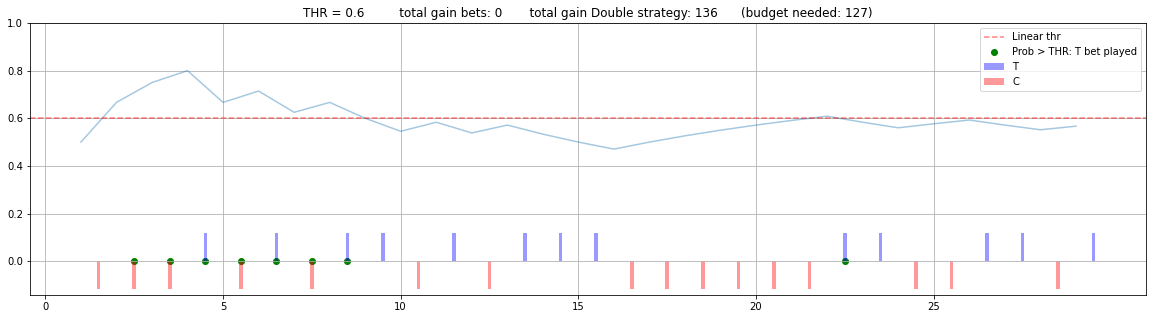

In [850]:
simulate(turns=30, THR=0.6,
         plot_simulation=True)

(1, 32.0, 31)

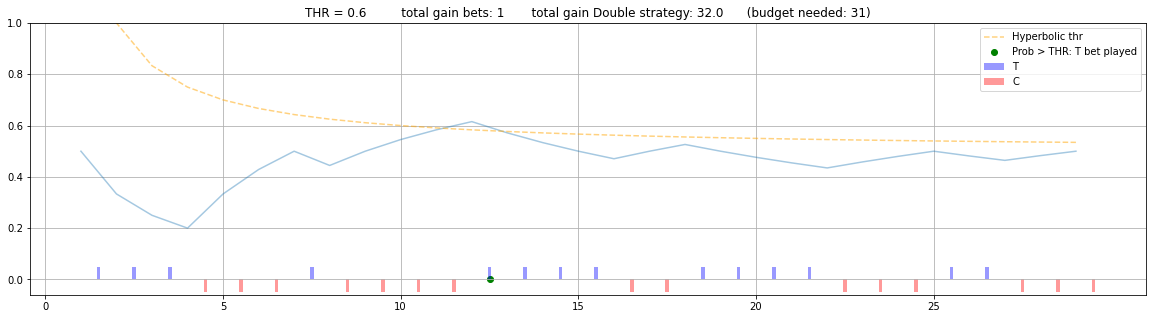

In [884]:
simulate(turns=30, THR=0.6, thr_type='hyp',
         plot_simulation=True)

(2, 26, 31)

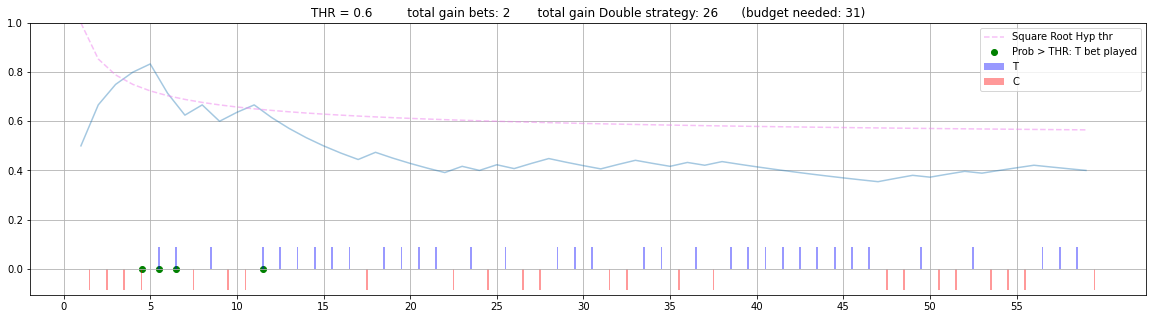

In [887]:
simulate(turns=60, THR=0.6, thr_type='root hyp', cost_hyp=0.5,
         plot_simulation=True)

(2, 42, 63)

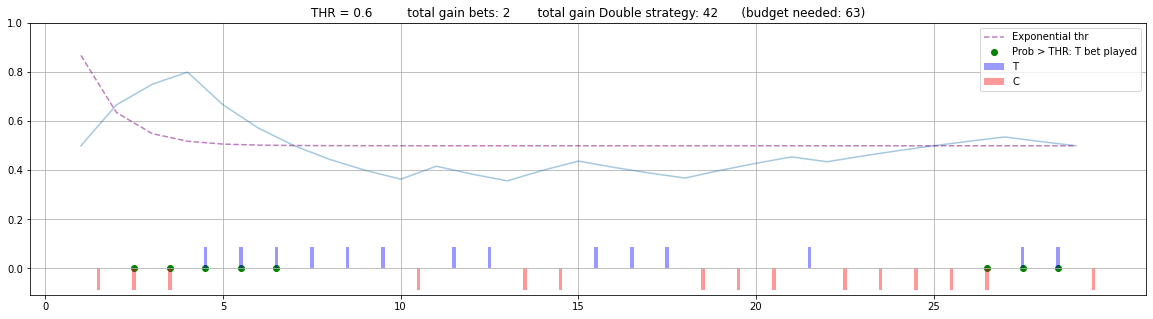

In [888]:
simulate(turns=30, THR=0.6, thr_type='exp',
         plot_simulation=True)

----------------------------------------------------------------

Total valid simulation 396


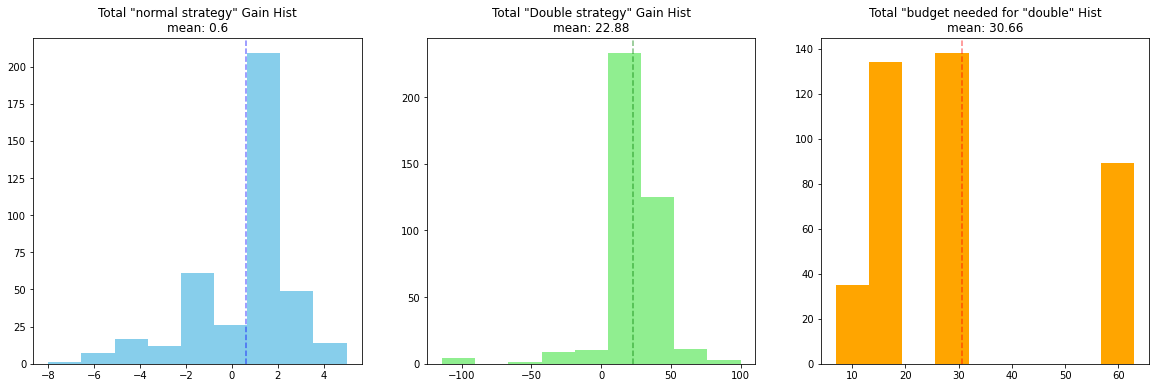

In [722]:
num_simulations = 1000
limit_money = 100
X, Y, Z = [], [], []
for j in range(num_simulations):
    x, y, z = simulate(turns=20, THR=0.7, thr_type='hyperbolic',
                       plot_simulation=False)
    if x is not None:
        if z < limit_money:
            X.append(x), Y.append(y), Z.append(z) 

print(f'Total valid simulation {len(X)}')

fig, ax = plt.subplots(1, 3, figsize=(20,6))
bin_ratio = 0.5
ax[0].hist(X, bins=int(np.sqrt(len(X))*bin_ratio), color='skyblue')
ax[0].axvline(np.mean(X), color='blue', linestyle='dashed', alpha=0.5)
ax[0].set_title(f'Total "normal strategy" Gain Hist\nmean: {np.round(np.mean(X), 2)}');
ax[1].hist(Y, bins=int(np.sqrt(len(Y))*bin_ratio), color='lightgreen')
ax[1].axvline(np.mean(Y), color='green', linestyle='dashed', alpha=0.5)
ax[1].set_title(f'Total "Double strategy" Gain Hist\nmean: {np.round(np.mean(Y), 2)}');
ax[2].hist(Z, bins=int(np.sqrt(len(Z))*bin_ratio), color='orange')
ax[2].axvline(np.mean(Z), color='red', linestyle='dashed', alpha=0.5)
ax[2].set_title(f'Total "budget needed for "double" Hist\nmean: {np.round(np.mean(Z), 2)}');

--------------------------------------------------------------------

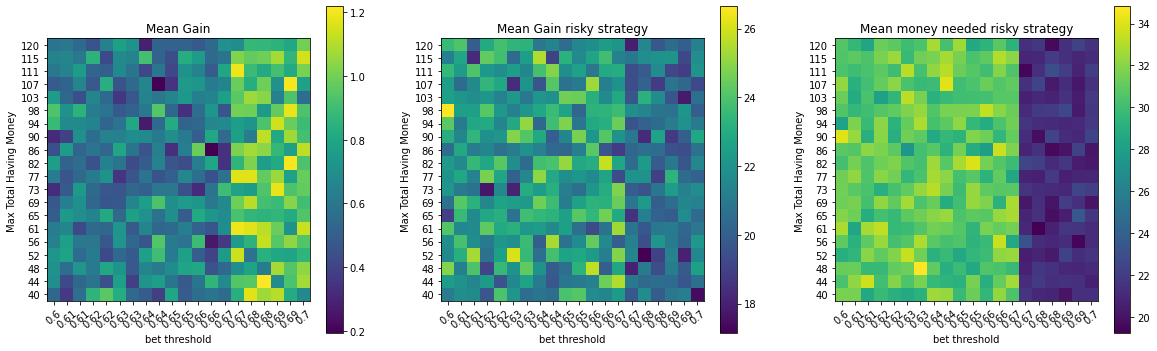

In [689]:
means = []
num = 20
matrix_x, matrix_y, matrix_z = np.zeros((num, num)), np.zeros((num, num)), np.zeros((num, num))
# ----- thrs -------
thrs = np.round(np.linspace(0.6, 0.7, num=num), 2)
# ------ budget limit -------
limits = np.linspace(120, 40, num=num).astype(int)
for i, THR in enumerate(thrs):
    for j, limit_money in enumerate(limits):
        num_simulations = 500
        X, Y, Z = [], [], []
        for sim in range(num_simulations):
            x, y, z = simulate(turns=20, THR=THR, thr_type='hyperbolic',
                               plot_simulation=False)
            if x is not None:
                if z < limit_money:
                    X.append(x), Y.append(y), Z.append(z) 
        xm, ym, zm = np.mean(X), np.mean(Y), np.mean(Z)
        matrix_x[i, j], matrix_y[i, j], matrix_z[i, j] = xm, ym, zm 
               
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ms = [matrix_x, matrix_y, matrix_z]
titles = ['Mean Gain', 'Mean Gain double strategy', 'budget needed for double strategy']

for i in range(3):
    im = ax[i].imshow(ms[i], origin='lower')
    ax[i].set_xticks(np.arange(len(thrs)))
    ax[i].set_xticklabels(thrs, rotation=40)
    ax[i].set_yticks(np.arange(len(limits)))
    ax[i].set_yticklabels(limits[::-1])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('bet threshold')
    ax[i].set_ylabel('Actual budget ')
    cbar = fig.colorbar(im, ax=ax[i])

plt.show()

-------------------------------------------------------------------------

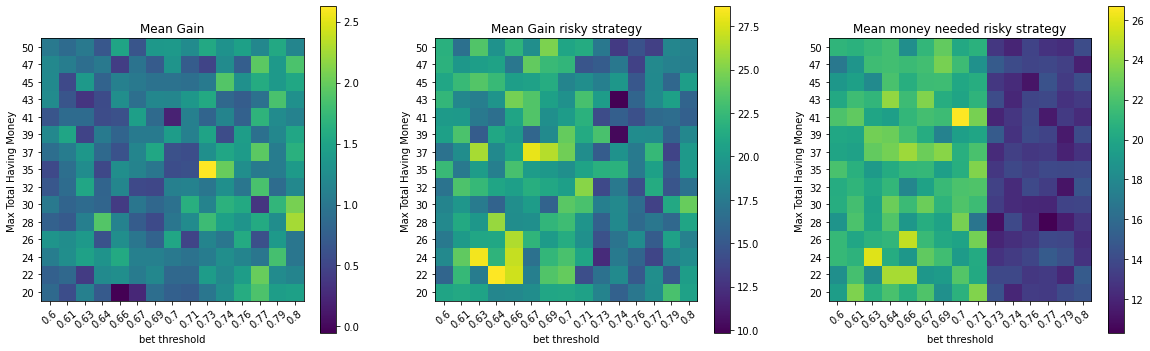

In [696]:
means = []
num = 15
matrix_x, matrix_y, matrix_z = np.zeros((num, num)), np.zeros((num, num)), np.zeros((num, num))
# ----- thrs -------
thrs = np.round(np.linspace(0.6, 0.8, num=num), 2)
# ------ budget limit -------
limits = np.linspace(50, 20, num=num).astype(int)
for i, THR in enumerate(thrs):
    for j, limit_money in enumerate(limits):
        num_simulations = 100
        X, Y, Z = [], [], []
        for sim in range(num_simulations):
            x, y, z = simulate(turns=20, THR=THR, thr_type='hyperbolic',
                               plot_simulation=False)
            if x is not None:
                if z < limit_money:
                    X.append(x), Y.append(y), Z.append(z) 
        xm, ym, zm = np.mean(X), np.mean(Y), np.mean(Z)
        matrix_x[i, j], matrix_y[i, j], matrix_z[i, j] = xm, ym, zm 
               
fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ms = [matrix_x, matrix_y, matrix_z]
titles = ['Mean Gain', 'Mean Gain risky strategy', 'Mean money needed risky strategy']

for i in range(3):
    im = ax[i].imshow(ms[i], origin='lower')
    ax[i].set_xticks(np.arange(len(thrs)))
    ax[i].set_xticklabels(thrs, rotation=40)
    ax[i].set_yticks(np.arange(len(limits)))
    ax[i].set_yticklabels(limits[::-1])
    ax[i].set_title(titles[i])
    ax[i].set_xlabel('bet threshold')
    ax[i].set_ylabel('Max Total Having Money ')
    cbar = fig.colorbar(im, ax=ax[i])

plt.show()

___________________

(10, 662, 511)

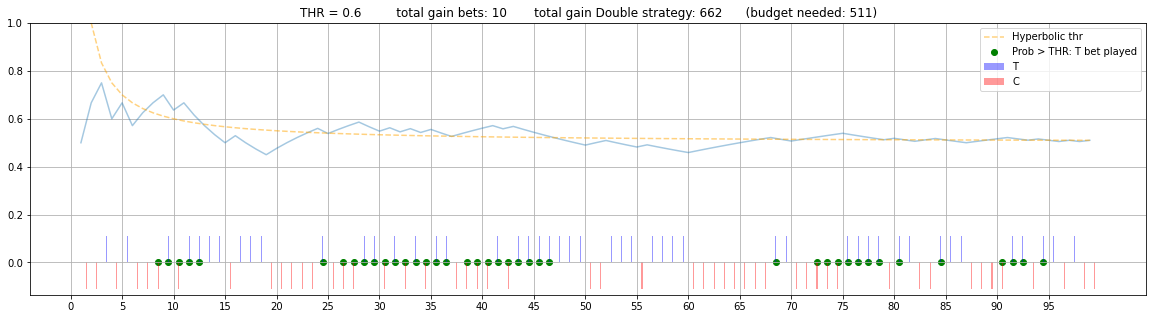

In [730]:
simulate(turns=100, THR=0.6, thr_type='hyperbolic',
         plot_simulation=True)

(4, 88.0, 63)

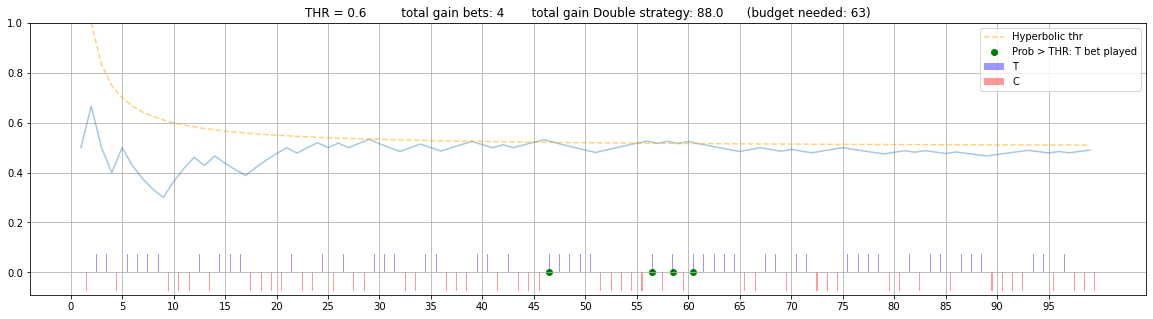

In [725]:
simulate(turns=100, THR=0.6, thr_type='hyperbolic',
         plot_simulation=True)

(1, 16.0, 15)

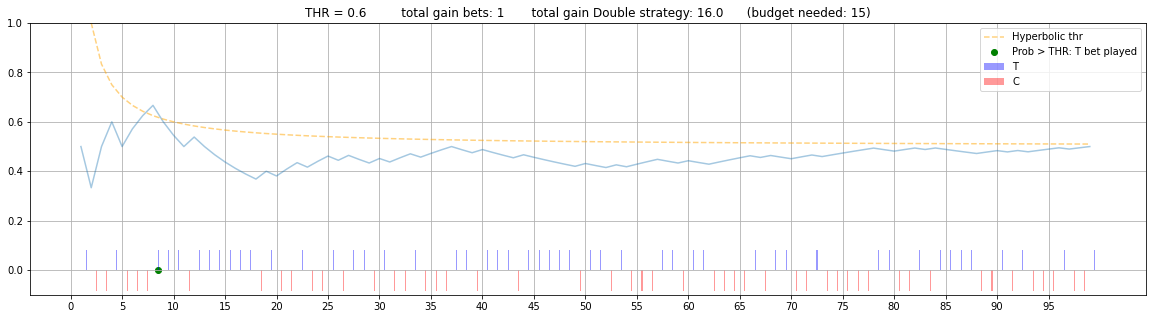

In [735]:
simulate(turns=100, THR=0.6, thr_type='hyperbolic',
         plot_simulation=True)

(-2, 340, 255)

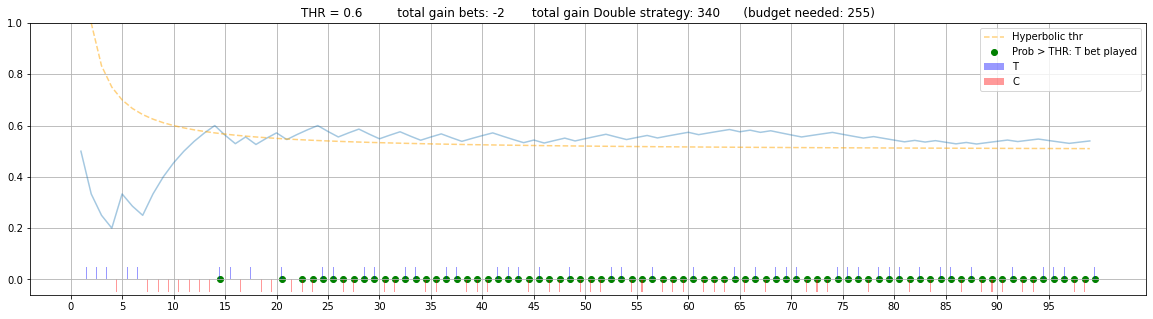

In [738]:
simulate(turns=100, THR=0.6, thr_type='hyperbolic',
         plot_simulation=True)

(4, 26, 7)

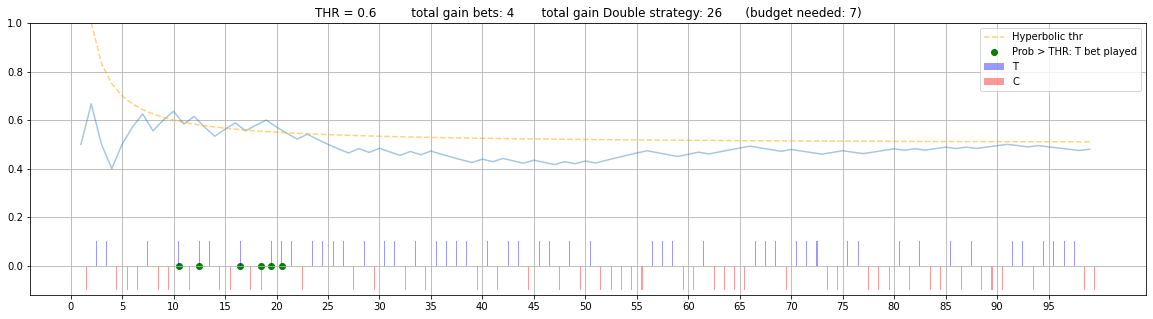

In [739]:
simulate(turns=100, THR=0.6, thr_type='hyperbolic',
         plot_simulation=True)

(4, 184, 511)

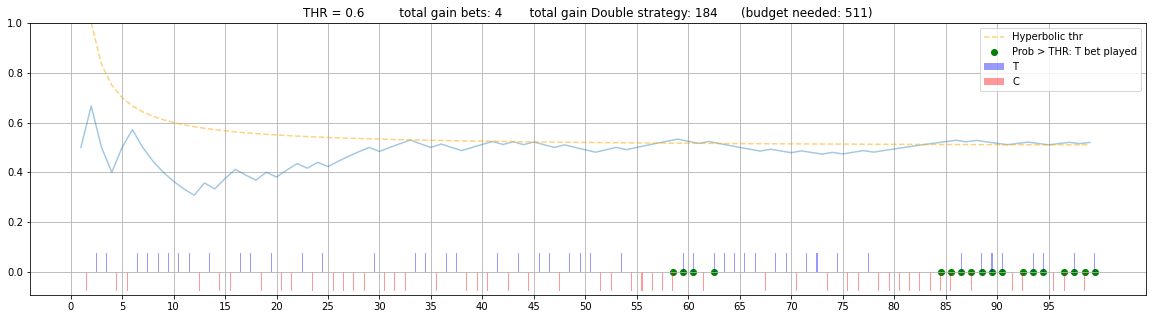

In [741]:
simulate(turns=100, THR=0.6, thr_type='hyperbolic',
         plot_simulation=True)

(None, None, None)

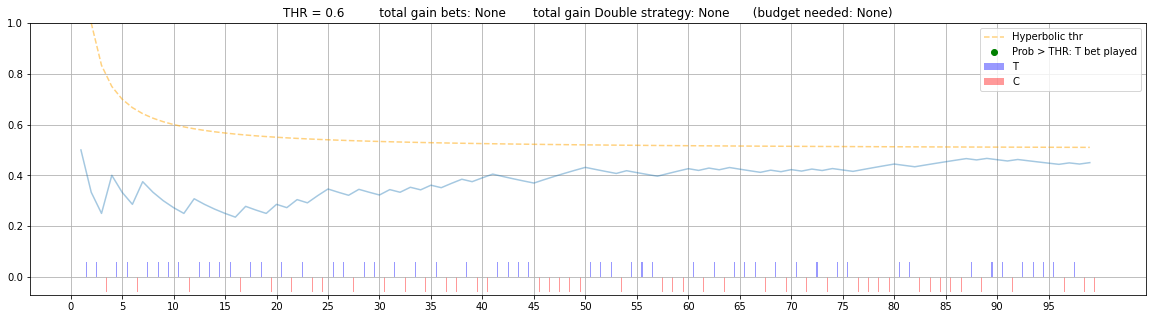

In [743]:
simulate(turns=100, THR=0.6, thr_type='hyperbolic',
         plot_simulation=True)

(1, 10, 15)

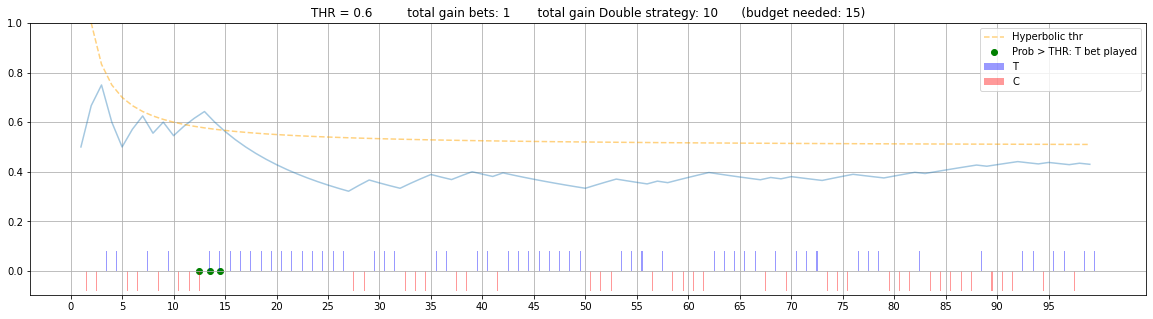

In [750]:
simulate(turns=100, THR=0.6, thr_type='hyperbolic',
         plot_simulation=True)

-----------------------------------------------

Changing eccentricity in hyperbolic threshold

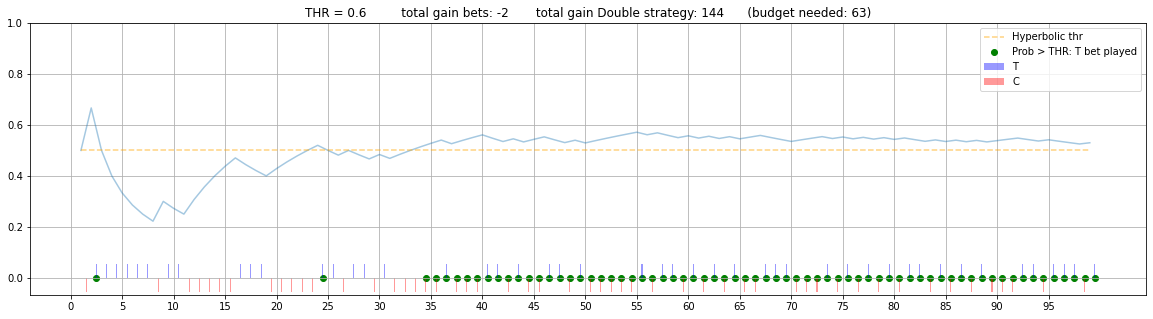

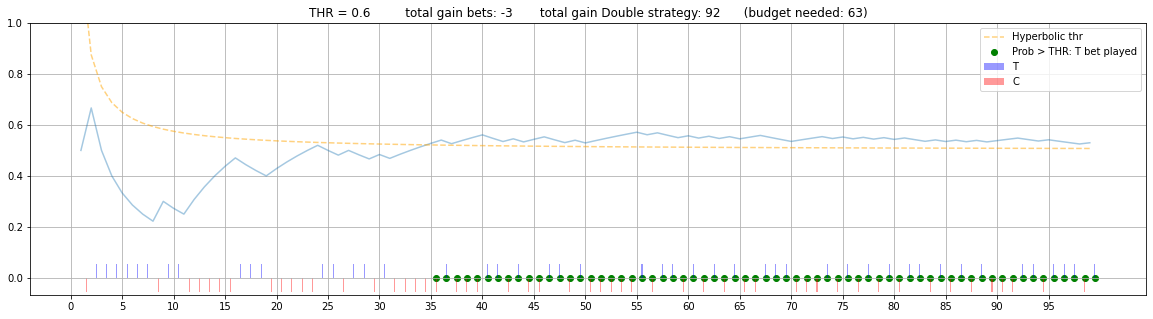

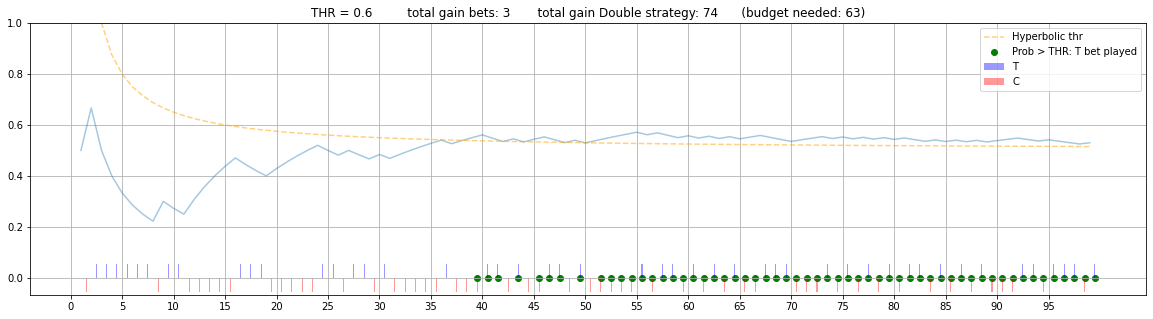

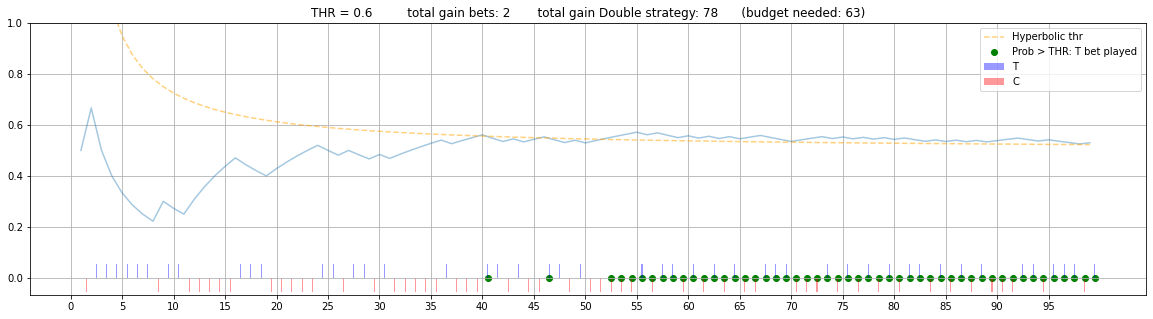

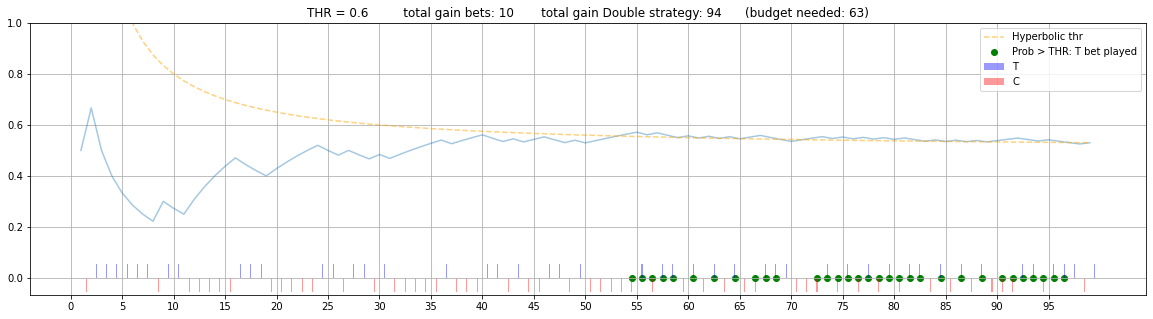

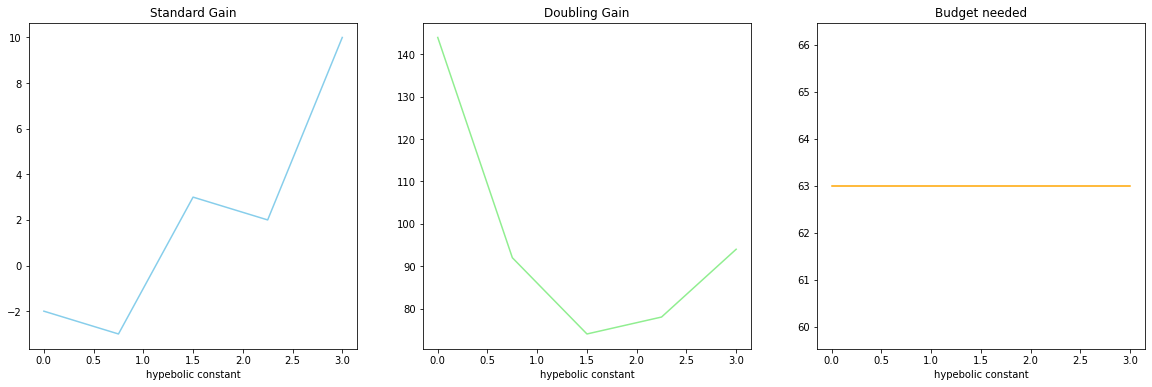

In [801]:
num_constants = 5
hyp_constants = np.linspace(0, 3, num=num_constants)
g_std, g_doubling, budgets_needed = [], [], []
for hyp_c in hyp_constants:
    std_gain, doubling_gain, doubl_budget = simulate(turns=100, THR=0.6, thr_type='hyperbolic', cost_hyp=hyp_c,
                       seed=5, plot_simulation=True)
    g_std.append(std_gain)
    g_doubling.append(doubling_gain)
    budgets_needed.append(doubl_budget)
    plt.show()

f, ax = plt.subplots(1, 3, figsize=(20,6))
ax[0].plot(hyp_constants, g_std, color='skyblue')
ax[0].set_title(f'Standard Gain'), ax[0].set_xlabel('hypebolic constant')
ax[1].plot(hyp_constants, g_doubling, color='lightgreen')
ax[1].set_title(f'Doubling Gain'), ax[1].set_xlabel('hypebolic constant')
ax[2].plot(hyp_constants, budgets_needed, color='orange')
ax[2].set_title(f'Budget needed'), ax[2].set_xlabel('hypebolic constant');

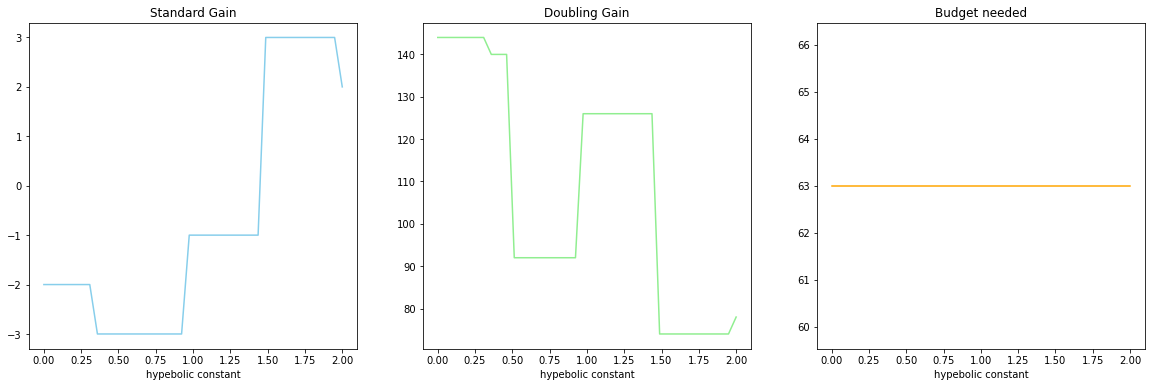

In [802]:
num_constants = 40
hyp_constants = np.linspace(0, 2, num=num_constants)
g_std, g_doubling, budgets_needed = [], [], []
for hyp_c in hyp_constants:
    std_gain, doubling_gain, doubl_budget = simulate(turns=100, THR=0.6, thr_type='hyperbolic', cost_hyp=hyp_c,
                       seed=5, plot_simulation=False)
    g_std.append(std_gain)
    g_doubling.append(doubling_gain)
    budgets_needed.append(doubl_budget)
    plt.show()
    
f, ax = plt.subplots(1, 3, figsize=(20,6))
ax[0].plot(hyp_constants, g_std, color='skyblue')
ax[0].set_title(f'Standard Gain'), ax[0].set_xlabel('hypebolic constant')
ax[1].plot(hyp_constants, g_doubling, color='lightgreen')
ax[1].set_title(f'Doubling Gain'), ax[1].set_xlabel('hypebolic constant')
ax[2].plot(hyp_constants, budgets_needed, color='orange')
ax[2].set_title(f'Budget needed'), ax[2].set_xlabel('hypebolic constant');

-----------------------------------------------------------------------

Long simulation

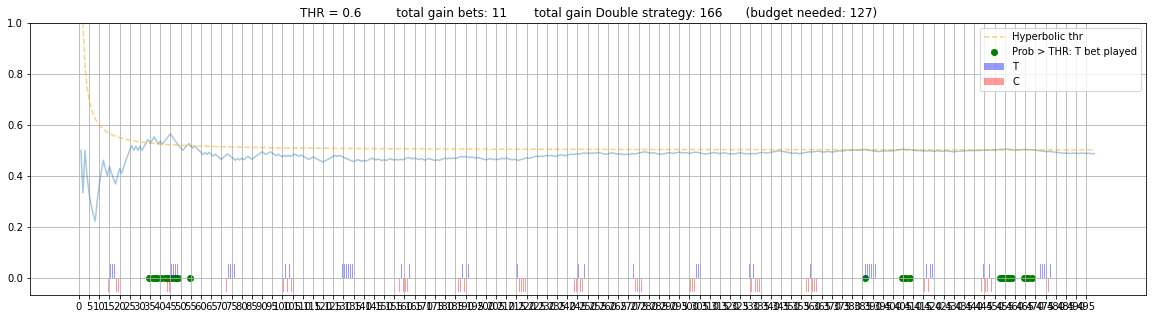

In [900]:
_, _, _ = simulate(turns=500, THR=0.6, thr_type='hyp', cost_hyp=1,
                                                 seed=4, plot_simulation=True)